<a href="https://colab.research.google.com/github/jalalbamniya/DataSet/blob/main/Student_Marks_Prediction_Regression_Problem_Model_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Marks Dataset
# Student Marks Prediction - Regression Problem

Using Decision Tree Regression,Linear Regression Model,RandomForest Regression,K-NN Calassiffican - Supervised Machine Learning Algorithm

### Load Libraries

Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### Load Data

In [ ]:
#importing datasets  
data=pd.read_csv("/content/Student_Marks.csv")
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
data.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [ ]:
data.shape

(100, 3)

In [ ]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


# Checking the null count

In [ ]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

#The dataset has 100 rows with 3 columns.
# The Features are:
number_courses: The number of courses a particulat student has enrolled in.
time_study: Number of hours a student studies

number_courses: The number of courses a particulat student has enrolled in.
time_study: Number of hours a student studies

# Target columns:

Marks: The average marks scored by the student.

# Preliminary Data Visuialization

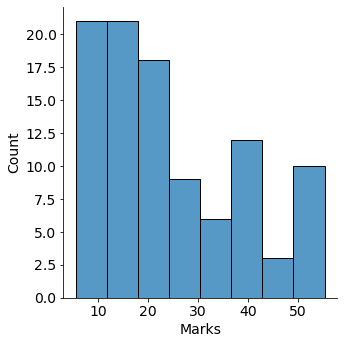

In [ ]:
#distribution of grades
sns.displot(data['Marks'])
plt.show()

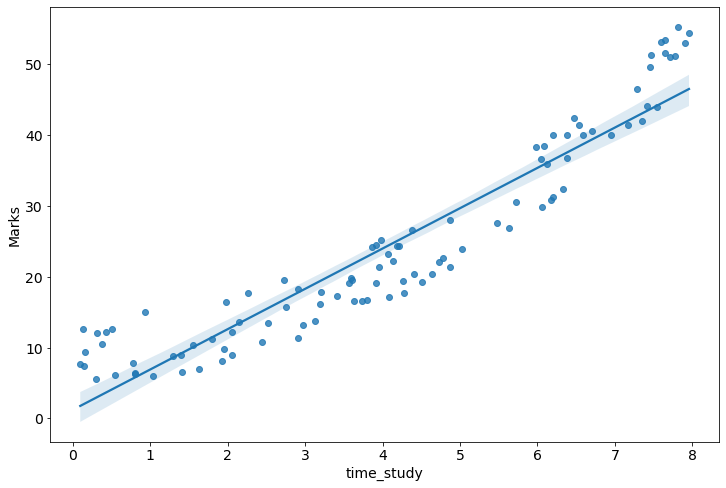

In [ ]:
#Relation between marks and time spent on studying
sns.regplot(x=data['time_study'],y=data['Marks'])
plt.show()

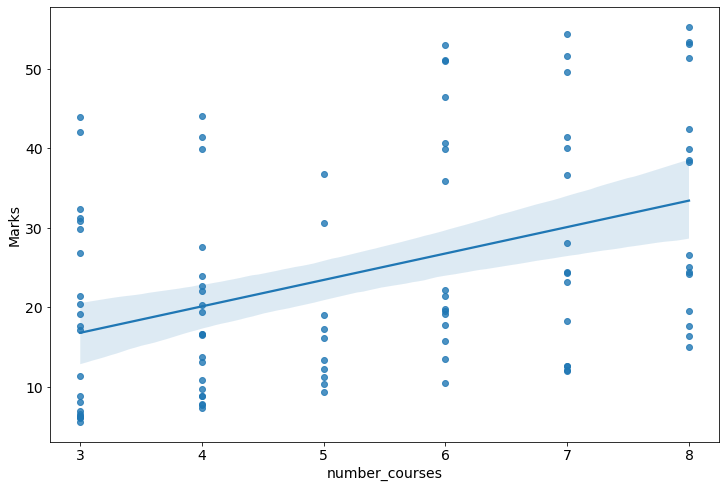

In [ ]:
#Relation between marks and courses
sns.regplot(x=data['number_courses'],y=data['Marks'])
plt.show()

In [ ]:
#Removing outliers
data.drop(data[(data['Marks']>40) & (data['number_courses']<5)].index,inplace=True)
data.drop(data[(data['Marks']>50)|(data['Marks']==0)].index,inplace=True)

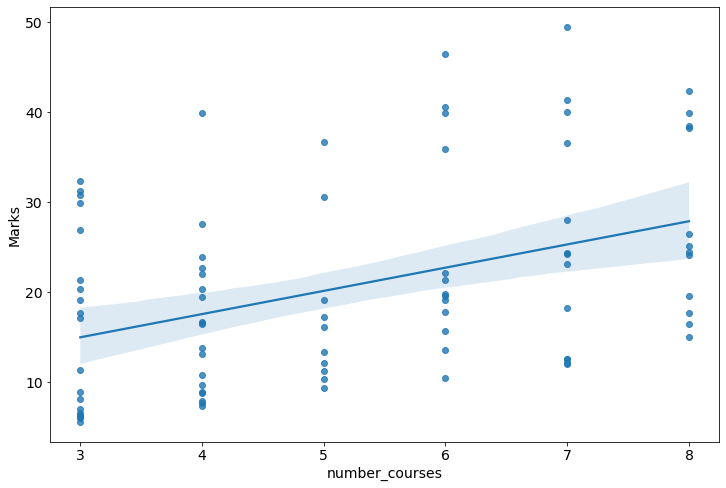

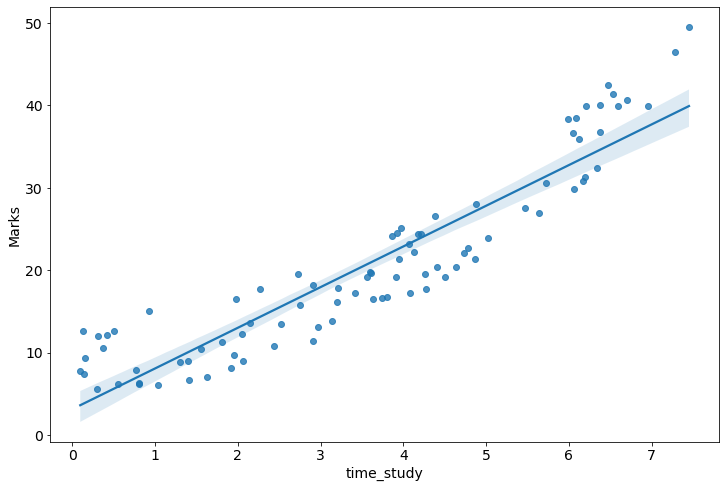

In [ ]:
#Relation after removing outliers
sns.regplot(x=data['number_courses'],y=data['Marks'])
plt.show()
sns.regplot(x=data['time_study'],y=data['Marks'])
plt.show()

# EDA

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': [12.0, 8.0],
                     'font.size': 14})

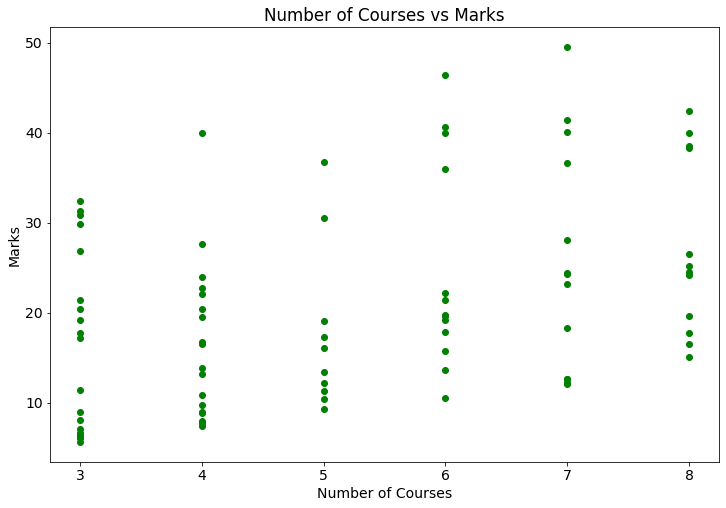

In [ ]:
plt.scatter(x=data['number_courses'], y=data['Marks'], c='g')
plt.xlabel("Number of Courses")
plt.ylabel("Marks")
plt.title("Number of Courses vs Marks");

# Inference

Students opting for more number of courses also score higher than the students opting for lesser number of courses.
Students opting for six or more courses are likely to score more than the students opting for five or less courss.

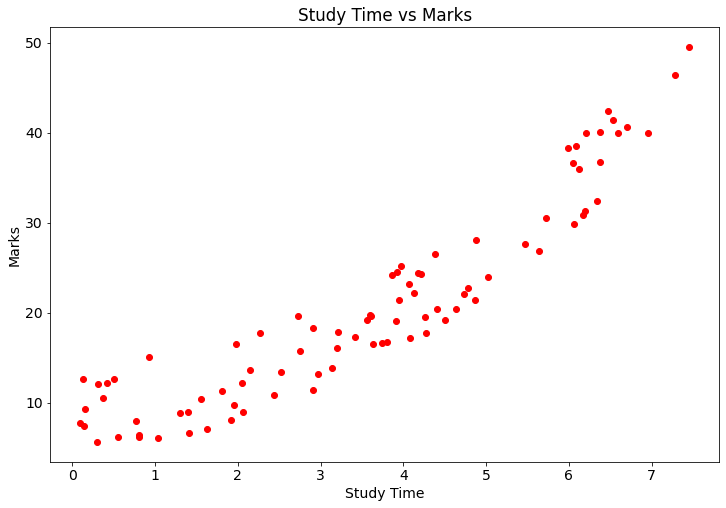

In [ ]:
plt.scatter(x=data['time_study'], y=data['Marks'], c='r')
plt.xlabel("Study Time")
plt.ylabel("Marks")
plt.title("Study Time vs Marks");

Students spending more time studying will score more marks. This is what prertty much happen in reality.

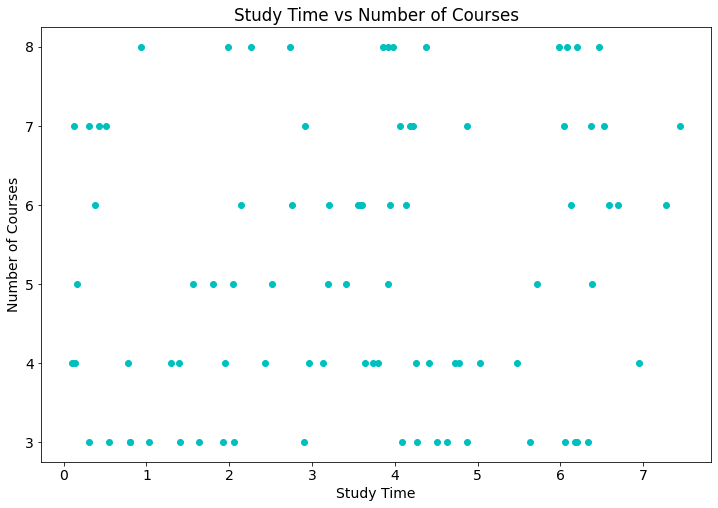

In [ ]:
plt.scatter(x=data['time_study'], y=data['number_courses'], c='c')
plt.xlabel("Study Time")
plt.ylabel("Number of Courses")
plt.title("Study Time vs Number of Courses");

Students opting for more number of subjects are likely to spend more time studying.
Students opting for six or more subjects spend more time studying than students opting for five or less subjects

In [ ]:
data.describe()

,number_courses,time_study,Marks
count,87.000000,87.000000,87.000000
mean,5.183908,3.548655,20.643713
std,1.768778,2.073944,11.047955
min,3.000000,0.096000,5.609000
25%,4.000000,1.938500,12.079500
50%,5.000000,3.736000,19.106000
75%,7.000000,4.951000,26.707000
max,8.000000,7.451000,49.544000


Inference: The stats seem to be fine, let us do further analysis on the Dataset

## Split Data

In [ ]:
x = data.iloc[:,1:2].values
y = data.iloc[:, -1].values

In [ ]:
X = data.drop('Marks', axis=1)
y = data['Marks']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (69, 2)
Shape of y_train =  (69,)
Shape of X_test =  (18, 2)
Shape of y_test =  (18,)


##Decision Tree Regression - ML Model Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(criterion='mse')


In [ ]:
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse')

In [ ]:
regressor.score(X_test, y_test)

0.9591971307921314

# Predict the value of marks

In [ ]:
X_test.iloc[-1, :]

number_courses    8.000
time_study        3.977
Name: 19, dtype: float64

In [ ]:
#regressor.predict([X_test.iloc[-1, :]])

In [ ]:
y_test.iloc[-1]

25.133

In [ ]:
pred = regressor.predict(X_test)
pred

array([19.59 , 24.318, 26.882, 13.119, 49.544, 20.348, 38.49 , 30.862,
       20.398, 39.965,  8.837, 17.822, 12.209, 15.038, 35.939, 19.59 ,
       15.038, 26.532])

In [ ]:
y_test

30    24.172
90    24.394
66    27.569
2     13.811
37    46.453
15    19.466
77    38.278
6     29.889
0     19.202
50    40.602
68     8.920
83    16.106
71    13.416
84    16.461
53    36.653
94    24.451
81    17.705
19    25.133
Name: Marks, dtype: float64

# RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pre=model.predict(X_test)

# Accuracy of the model

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pre))

0.9705426299287297


# K-NN Classiffication





In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pr=model.predict(X_test)

# Accuracy of the model

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pr))

0.9636607167982367


In [ ]:
print("Accuracy of Linear Regression is :- ",r2_score(y_test,y_pre))
print("Accuracy of RandomForestRegressor is :- ",r2_score(y_test,y_pre))
print("Accuracy of KNN is :- ",r2_score(y_test,y_pr))

Accuracy of Linear Regression is :-  0.9705426299287297
Accuracy of RandomForestRegressor is :-  0.9705426299287297
Accuracy of KNN is :-  0.9636607167982367


It is found that the KNN algorithm has the more accuracy as compared to the linearregression and randomforestregressor

# Logistic Regression

In [ ]:
data.sort_values(by=['number_courses'], inplace=True)
print(data)

    number_courses  time_study   Marks
0                3       4.508  19.202
96               3       0.301   5.609
87               3       1.033   6.053
79               3       0.805   6.349
75               3       0.803   6.217
..             ...         ...     ...
17               8       6.080  38.490
19               8       3.977  25.133
30               8       3.864  24.172
32               8       0.932  15.038
27               8       4.378  26.532

[87 rows x 3 columns]


In [ ]:
import statistics
print(statistics.mean(data.Marks))

20.64371264367816


lets consider 25 as average passing marks for the class

In [ ]:
Pass_or_Fail = []
for row in data['Marks']:
    if row <= 25.0 :
        Pass_or_Fail.append(0)
    else:
        Pass_or_Fail.append(1)
data['Pass_or_Fail'] =Pass_or_Fail
print(data)

    number_courses  time_study   Marks  Pass_or_Fail
0                3       4.508  19.202             0
96               3       0.301   5.609             0
87               3       1.033   6.053             0
79               3       0.805   6.349             0
75               3       0.803   6.217             0
..             ...         ...     ...           ...
17               8       6.080  38.490             1
19               8       3.977  25.133             1
30               8       3.864  24.172             0
32               8       0.932  15.038             0
27               8       4.378  26.532             1

[87 rows x 4 columns]


Taking the number of course and time_study as features and pass or fail as dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
#y_train.reshapes(len(y_train),1);

In [ ]:
#from sklearn.linear_model import LogisticRegression
#import seaborn as sns
#reg = LogisticRegression(random_state = 0)
#reg.fit(x_train, y_train)
#y_predict = reg.predict (x_test)
#sns.regplot(x = 'time_study', y = 'Pass_or_Fail', data = data, logistic=True, ci=None)

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns='Marks'),data['Marks'], test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.metrics import r2_score
lr = LinearRegression().fit(x_train, y_train)
print(r2_score(y_test,lr.predict(x_test)))

0.9401496369406348


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression().fit(x_train, y_train)
print(r2_score(y_test,lr.predict(x_test)))

0.9401496369406348
